In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import feature_util
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## I - Unfiltered

In [3]:
data_unfiltered = pd.read_csv("New Datasets/renamed_smartfall_training_dataset.csv")
data_unfiltered = pd.concat([data_unfiltered, pd.read_csv("New Datasets/renamed_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)
# data = pd.read_csv("New Datasets/filtered_standardised_smartfall_testing_dataset.csv")
# data = pd.concat([data, pd.read_csv("New Datasets/filtered_standardised_smartfall_training_dataset.csv")], axis=0).reset_index(drop=True)

data_unfiltered = data_unfiltered.drop(['Unnamed: 0'], axis=1)
data_unfiltered

,x_ax,y_ax,z_ax,outcome
0,1.058105,0.096436,0.113037,0
1,0.718506,0.233887,0.220703,0
2,0.718506,0.233887,0.220703,0
3,0.960205,0.190430,0.051270,0
4,0.960205,0.190430,0.051270,0
...,...,...,...,...
183801,0.867188,0.416016,0.086426,0
183802,0.780518,0.477539,0.062256,0
183803,0.653076,0.355469,0.117920,0
183804,0.675293,0.513672,-0.014160,0


In [4]:
Fs = 31.25
frame_size = int(Fs * 1) # 31.25Hz and 1s window
hop_size = int(frame_size * 0.5) # 50% overlap, i.e. 0.5s

In [5]:
X_unfiltered, y_unfiltered = feature_util.get_frames(data_unfiltered, frame_size, hop_size, True)
features_unfiltered = feature_util.extract_features(X_unfiltered)
features_unfiltered.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [6]:
feature_df = pd.DataFrame(features_unfiltered)

y_df = pd.DataFrame(y_unfiltered)
y_df = y_df.rename(mapper={0:"outcome"}, axis=1)
y_df
feature_and_outcome_df = pd.concat([feature_df, y_df], axis=1)

In [7]:
feature_and_outcome_df['outcome'].value_counts()

0    11390
1      862
Name: outcome, dtype: int64

In [8]:
falls_df = feature_and_outcome_df[feature_and_outcome_df['outcome'] == 1]
not_falls_df = feature_and_outcome_df[feature_and_outcome_df['outcome'] == 0]

undersampled_not_falls = not_falls_df.sample(n=len(falls_df), random_state=42)
balanced_features = pd.concat([undersampled_not_falls, falls_df])
balanced_features = balanced_features.sample(frac=1, random_state=42)
balanced_features

,0,1,2,3,4,5,6,7,8,9,10,outcome
5572,0.566784,0.549584,0.546773,0.156851,0.164457,0.172647,-0.610592,-0.521435,0.289486,1.514484,0.598806,0
2108,0.357327,0.318808,0.661219,1.066467,0.774497,1.461452,11.595843,3.404450,17.331492,8.000440,0.067235,1
2899,0.049419,0.096128,0.100452,0.705784,0.709518,0.703655,-0.532757,-0.552986,-0.374675,2.930617,0.104219,0
4603,0.295859,0.726295,0.579204,1.384599,1.495903,0.589245,4.794845,10.590046,2.100255,7.888889,0.321534,1
5589,0.407573,0.357934,0.362580,0.432085,0.412322,0.424326,-0.565369,-0.624363,-0.640411,2.223094,0.082065,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,0.557019,0.531258,0.413921,1.525217,0.810083,1.082528,6.372969,4.462876,1.621395,7.173479,0.133425,1
4270,0.345042,0.627867,0.365392,1.459652,1.265349,1.026974,4.668593,6.672230,3.157441,8.244430,0.150188,1
9936,-0.084142,-0.066461,-0.046253,0.520574,0.515974,0.523738,-1.279689,-1.320631,-1.373086,1.475522,0.025364,0
7604,0.289850,-0.169418,-0.246283,1.348624,1.805470,1.573673,4.233266,4.907799,15.448049,8.290070,0.084011,1


In [9]:
features_shuffled = balanced_features.drop(columns=['outcome'])
features_shuffled

outcome_shuffled = balanced_features.loc[:,['outcome']]
outcome_shuffled.value_counts()

outcome
0          862
1          862
dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_shuffled, outcome_shuffled, test_size=0.25, random_state=0, stratify=outcome_shuffled)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1293, 11), (431, 11), (1293, 1), (431, 1))

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 646, 1: 647}

### Traditional Machine Learning Methods

In [13]:
model_name_array = []
model_acc_array = []

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [17]:
# Predict on the test set
predicted = knn_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(f1_score(y_test, predicted, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
model_name_array.append("knn")
model_acc_array.append(accuracy_score(y_test, predicted))

[[191  25]
 [ 25 190]]
0.8839907192575406
0.8839907192575406


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [19]:
from sklearn import svm

In [20]:
svm_model = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [21]:
# Predict on the test set
predicted_svm = svm_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_svm))
print(accuracy_score(y_test, predicted_svm))
print(f1_score(y_test, predicted_svm, average='micro'))

model_name_array.append("svm")
model_acc_array.append(accuracy_score(y_test, predicted_svm))

[[197  19]
 [ 29 186]]
0.888631090487239
0.888631090487239


In [22]:
svm_rbf_model = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [23]:
# Predict on the test set
predicted_svm_rbf = svm_rbf_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_svm_rbf))
print(accuracy_score(y_test, predicted_svm_rbf))
print(f1_score(y_test, predicted_svm_rbf, average='micro'))
model_name_array.append("svm_rbf")
model_acc_array.append(accuracy_score(y_test, predicted_svm_rbf))


[[195  21]
 [ 26 189]]
0.8909512761020881
0.8909512761020881


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_42680\2856838272.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Predict on the test set
predicted_rf = rf_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_rf))
print(accuracy_score(y_test, predicted_rf))
print(f1_score(y_test, predicted_rf, average='micro'))
model_name_array.append("rf")
model_acc_array.append(accuracy_score(y_test, predicted_rf))

[[197  19]
 [ 13 202]]
0.925754060324826
0.925754060324826


In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
# Predict on the test set
predicted_nb = nb_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_nb))
print(accuracy_score(y_test, predicted_nb))
print(f1_score(y_test, predicted_nb, average='micro'))
model_name_array.append("nb")
model_acc_array.append(accuracy_score(y_test, predicted_nb))


[[198  18]
 [ 41 174]]
0.8631090487238979
0.8631090487238979


In [30]:
best_trad_model_acc = max(model_acc_array)
index = model_acc_array.index(max(model_acc_array))
best_trad_model = model_name_array[index]
print(f"Best model: {best_trad_model}, Accuracy: {best_trad_model_acc}")
# model_acc_array

Best model: rf, Accuracy: 0.925754060324826


In [31]:
for i in range(0, len(model_name_array)):
    print(f"name: {model_name_array[i]}, accuracy: {model_acc_array[i]}")

name: knn, accuracy: 0.8839907192575406
name: svm, accuracy: 0.888631090487239
name: svm_rbf, accuracy: 0.8909512761020881
name: rf, accuracy: 0.925754060324826
name: nb, accuracy: 0.8631090487238979


In [32]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 646, 1: 647}

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
unfiltered_model_dictionary = {"knn": knn_model,
                             "svm": svm_model,
                             "svm_rbf": svm_rbf_model,
                             "rf": rf_model,
                             "nb": nb_model}

In [35]:
def perform_cross_val_all_models(model_dictionary, X_train, y_train, num_folds=5):
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores_array = []

    for model_name in model_dictionary:
        model = model_dictionary[model_name]
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        scores_array.append((model_name, scores))
    
    return scores_array

In [36]:
scores_array = perform_cross_val_all_models(unfiltered_model_dictionary, X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [37]:
for cv_tuple in scores_array:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.89 (+/- 0.03)
svm Accuracy: 0.90 (+/- 0.03)
svm_rbf Accuracy: 0.91 (+/- 0.03)
rf Accuracy: 0.91 (+/- 0.03)
nb Accuracy: 0.89 (+/- 0.03)


In [38]:
from sklearn.metrics import classification_report

In [39]:
def print_all_classification_reports(model_dictionary, X_test, y_test): # broken!!! only works for filtered data. TODO: change X_test and y_test to params
        for model_name in model_dictionary:
                print("Classification report for %s" % model_name)
                model = model_dictionary[model_name]
                predicted = model.predict(X_test)
                print(classification_report(y_test, predicted))
                print("=====================================================")

In [40]:
print_all_classification_reports(unfiltered_model_dictionary, X_test, y_test)

Classification report for knn
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       216
           1       0.88      0.88      0.88       215

    accuracy                           0.88       431
   macro avg       0.88      0.88      0.88       431
weighted avg       0.88      0.88      0.88       431

Classification report for svm
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       216
           1       0.91      0.87      0.89       215

    accuracy                           0.89       431
   macro avg       0.89      0.89      0.89       431
weighted avg       0.89      0.89      0.89       431

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       216
           1       0.90      0.88      0.89       215

    accuracy                           0.89       431
   macro avg       0.89      0.89 

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
def print_all_classification_reports_training(model_dictionary, X_train, y_train):
        for model_name in model_dictionary:
                print("Classification report for %s" % model_name)
                model = model_dictionary[model_name]
                predicted = model.predict(X_train)
                print(classification_report(y_train, predicted))
                print("=====================================================")

In [42]:
print_all_classification_reports_training(unfiltered_model_dictionary, X_train, y_train)

Classification report for knn
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       646
           1       0.90      0.94      0.92       647

    accuracy                           0.92      1293
   macro avg       0.92      0.92      0.92      1293
weighted avg       0.92      0.92      0.92      1293

Classification report for svm
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       646
           1       0.91      0.89      0.90       647

    accuracy                           0.90      1293
   macro avg       0.90      0.90      0.90      1293
weighted avg       0.90      0.90      0.90      1293

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       646
           1       0.90      0.92      0.91       647

    accuracy                           0.91      1293
   macro avg       0.91      0.91 

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [147]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'Final Models/exp1_rf_unfiltered.joblib')

['Final Models/exp1_rf_unfiltered.joblib']

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [44]:
X_unfiltered_undersampled, y_unfiltered_underampled = feature_util.balance_windows_undersample(X_unfiltered, y_unfiltered)
X_unfiltered_undersampled.shape, y_unfiltered_underampled.shape

((1724, 31, 3), (1724,))

In [45]:
# X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_unfiltered, y_unfiltered, test_size=0.25, random_state=0, stratify=y_unfiltered)
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_unfiltered_undersampled, y_unfiltered_underampled, test_size=0.25, random_state=0, stratify=y_unfiltered_underampled)
X_raw_train.shape, X_raw_test.shape, y_raw_train.shape

((1293, 31, 3), (431, 31, 3), (1293,))

In [46]:
X_raw_train[0].shape

(31, 3)

In [47]:
X_TRAIN_SIZE = X_raw_train.shape[0]
X_TEST_SIZE = X_raw_test.shape[0]
X_TRAIN_WINDOW_SIZE = X_raw_train.shape[1]
X_TEST_WINDOW_SIZE = X_raw_test.shape[1]

In [48]:
X_raw_train = X_raw_train.reshape(X_TRAIN_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)
X_raw_test = X_raw_test.reshape(X_TEST_SIZE, X_TEST_WINDOW_SIZE, 3, 1)

In [49]:
X_raw_train[0].shape, X_raw_test[0].shape

((31, 3, 1), (31, 3, 1))

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [51]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_train[0].shape))
cnn_model.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))

In [52]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
NUMBER_OF_EPOCHS = 15

In [54]:
history = cnn_model.fit(X_raw_train, y_raw_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_test, y_raw_test), verbose=1)

Epoch 1/15
41/41 [==============================] - 2s 13ms/step - loss: 0.4138 - accuracy: 0.8237 - val_loss: 0.2106 - val_accuracy: 0.9281
Epoch 2/15
41/41 [==============================] - 0s 4ms/step - loss: 0.1856 - accuracy: 0.9404 - val_loss: 0.1670 - val_accuracy: 0.9350
Epoch 3/15
41/41 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9497 - val_loss: 0.1537 - val_accuracy: 0.9397
Epoch 4/15
41/41 [==============================] - 0s 4ms/step - loss: 0.1232 - accuracy: 0.9613 - val_loss: 0.1570 - val_accuracy: 0.9350
Epoch 5/15
41/41 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9675 - val_loss: 0.1568 - val_accuracy: 0.9374
Epoch 6/15
41/41 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9722 - val_loss: 0.1518 - val_accuracy: 0.9466
Epoch 7/15
41/41 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9737 - val_loss: 0.1610 - val_accuracy: 0.9490
Epoch 8/15
41/41 [=

In [55]:
import matplotlib.pyplot as plt

In [56]:
def plot_learning_curve(history, epochs):
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

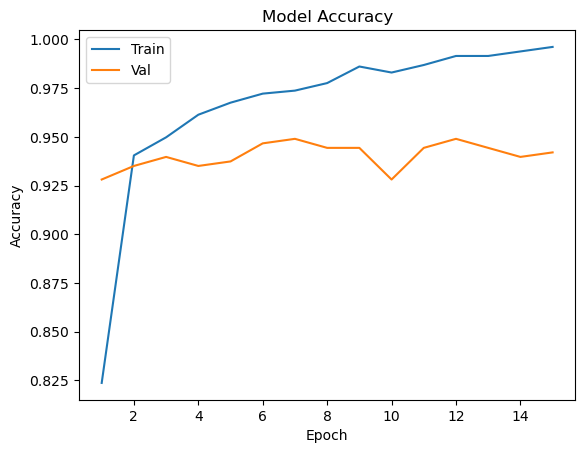

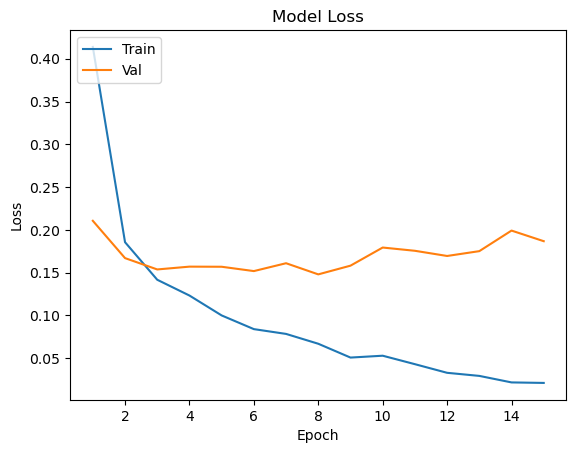

In [57]:
plot_learning_curve(history, NUMBER_OF_EPOCHS)

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

In [59]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn = np.argmax(cnn_model.predict(X_raw_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_test, predicted_cnn))
print(accuracy_score(y_raw_test, predicted_cnn))
print(f1_score(y_raw_test, predicted_cnn, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

14/14 [==============================] - 0s 2ms/step
[[206  10]
 [ 15 200]]
0.9419953596287703
0.9419953596287703


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_test, predicted_cnn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       216
           1       0.95      0.93      0.94       215

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431



In [61]:
# results = cnn_model.evaluate(X_raw_test, y_raw_test)
# print("test loss, test acc: ", results)

In [144]:
cnn_unfiltered_cv_metrics = feature_util.cross_val_cnn(X_raw_train, y_raw_train, X_raw_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_unfiltered_cv_metrics)

0.9435395359992981


In [149]:
# cnn_model.save('Final Models/exp1_cnn_unfiltered')

INFO:tensorflow:Assets written to: Final Models/exp1_cnn_unfiltered\assets


INFO:tensorflow:Assets written to: Final Models/exp1_cnn_unfiltered\assets


## II - Filtered

In [62]:
data_filtered = pd.read_csv("New Datasets/filtered_smartfall_training_dataset.csv")
data_filtered = pd.concat([data_filtered, pd.read_csv("New Datasets/filtered_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)

data_filtered = data_filtered.drop(['Unnamed: 0'], axis=1)
data_filtered

,x_ax,y_ax,z_ax,outcome
0,1.058341,0.096574,0.112934,0
1,0.895934,0.178424,0.163770,0
2,0.813437,0.222202,0.169857,0
3,0.828629,0.216133,0.119465,0
4,0.894310,0.179974,0.040379,0
...,...,...,...,...
183801,0.855340,0.367065,0.089292,0
183802,0.750066,0.405776,0.084742,0
183803,0.692327,0.453963,0.054610,0
183804,0.705525,0.527850,-0.023513,0


In [63]:
X_filtered, y_filtered = feature_util.get_frames(data_filtered, frame_size, hop_size, True)
features_filtered = feature_util.extract_features(X_filtered)
features_filtered.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [64]:
feature_filtered_df = pd.DataFrame(features_filtered)

y_filtered_df = pd.DataFrame(y_filtered)
y_filtered_df = y_filtered_df.rename(mapper={0:"outcome"}, axis=1)
y_filtered_df
feature_and_outcome_filtered_df = pd.concat([feature_filtered_df, y_filtered_df], axis=1)

In [65]:
feature_and_outcome_filtered_df['outcome'].value_counts()

0    11390
1      862
Name: outcome, dtype: int64

In [66]:
falls_filtered_df = feature_and_outcome_filtered_df[feature_and_outcome_filtered_df['outcome'] == 1]
not_falls_filtered_df = feature_and_outcome_filtered_df[feature_and_outcome_filtered_df['outcome'] == 0]

undersampled_not_falls_filtered = not_falls_filtered_df.sample(n=len(falls_filtered_df), random_state=42)
balanced_features_filtered = pd.concat([undersampled_not_falls_filtered, falls_filtered_df])
balanced_features_filtered = balanced_features_filtered.sample(frac=1, random_state=42)
balanced_features_filtered

,0,1,2,3,4,5,6,7,8,9,10,outcome
5572,0.563255,0.547300,0.548597,0.150201,0.147291,0.150750,-0.667199,-0.723564,-0.499222,1.453727,0.604877,0
2108,0.437992,0.452197,0.445794,0.758991,0.721840,0.768077,6.561224,2.108846,7.740681,4.668490,0.145525,1
2899,0.091205,0.069713,0.078839,0.684882,0.675422,0.674243,-0.258293,-0.602683,-0.591433,2.814919,0.245526,0
4603,0.539319,0.518820,0.514932,0.706581,0.680098,0.637549,3.624315,1.504952,3.596003,3.913648,0.336627,1
5589,0.402067,0.369213,0.363785,0.432440,0.416568,0.406856,-0.632807,-0.534244,-0.667952,2.253072,0.048876,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,0.486481,0.501617,0.504582,0.583232,0.584460,0.639529,1.873074,1.118648,-0.161801,3.722797,0.145906,1
4270,0.453592,0.458569,0.425169,0.890483,0.846867,0.871765,5.144472,5.637226,1.658816,6.093663,0.099027,1
9936,-0.086226,-0.059767,-0.047698,0.519741,0.511010,0.527623,-1.298370,-1.308462,-1.379745,1.486591,0.097219,0
7604,-0.036306,-0.032490,-0.050403,1.224656,1.204645,1.171669,7.811374,2.445133,8.763307,6.371651,0.148762,1


In [67]:
features_filtered_shuffled = balanced_features_filtered.drop(columns=['outcome'])
features_filtered_shuffled

outcome_filtered_shuffled = balanced_features_filtered.loc[:,['outcome']]
outcome_filtered_shuffled.value_counts()

outcome
0          862
1          862
dtype: int64

In [68]:
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(features_filtered_shuffled, outcome_filtered_shuffled, test_size=0.25, random_state=0, stratify=outcome_filtered_shuffled)

In [69]:
X_filtered_train.shape, X_filtered_test.shape, y_filtered_train.shape, y_filtered_test.shape

((1293, 11), (431, 11), (1293, 1), (431, 1))

In [70]:
unique, counts = np.unique(y_filtered_train, return_counts=True)
dict(zip(unique, counts))

{0: 646, 1: 647}

### Traditional Machine Learning Methods

In [71]:
filtered_model_name_array = []
filtered_model_acc_array = []

In [72]:
knn_model_filtered = KNeighborsClassifier(n_neighbors=5)
knn_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [73]:
# Predict on the test set
predicted_knn_filtered = knn_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_knn_filtered))
print(accuracy_score(y_filtered_test, predicted_knn_filtered))
print(f1_score(y_filtered_test, predicted_knn_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("knn")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_knn_filtered))

[[187  29]
 [ 19 196]]
0.888631090487239
0.888631090487239


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [75]:
svm_model_filtered = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [76]:
# Predict on the test set
predicted_svm_filtered = svm_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_svm_filtered))
print(accuracy_score(y_filtered_test, predicted_svm_filtered))
print(f1_score(y_filtered_test, predicted_svm_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("svm")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_svm_filtered))

[[196  20]
 [ 17 198]]
0.91415313225058
0.91415313225058


In [77]:
svm_rbf_model_filtered = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [78]:
# Predict on the test set
predicted_svm_rbf_filtered = svm_rbf_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_svm_rbf_filtered))
print(accuracy_score(y_filtered_test, predicted_svm_rbf_filtered))
print(f1_score(y_filtered_test, predicted_svm_rbf_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("svm_rbf")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_svm_rbf_filtered))

[[189  27]
 [ 17 198]]
0.8979118329466357
0.8979118329466356


In [79]:
rf_model_filtered = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_filtered.fit(X_filtered_train, y_filtered_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_42680\3673001609.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_filtered.fit(X_filtered_train, y_filtered_train)


RandomForestClassifier(random_state=42)

In [80]:
# Predict on the test set
predicted_rf_filtered = rf_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_rf_filtered))
print(accuracy_score(y_filtered_test, predicted_rf_filtered))
print(f1_score(y_filtered_test, predicted_rf_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("rf")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_rf_filtered))

[[189  27]
 [ 13 202]]
0.9071925754060325
0.9071925754060325


In [81]:
nb_model_filtered = GaussianNB()
nb_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [82]:
# Predict on the test set
predicted_nb_filtered = nb_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_nb_filtered))
print(accuracy_score(y_filtered_test, predicted_nb_filtered))
print(f1_score(y_filtered_test, predicted_nb_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("nb")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_nb_filtered))

[[197  19]
 [ 44 171]]
0.8538283062645011
0.8538283062645012


In [83]:
best_trad_model_acc_filtered = max(filtered_model_acc_array)
index = filtered_model_acc_array.index(max(filtered_model_acc_array))
best_trad_model_filtered = filtered_model_name_array[index]
print(f"Best model: {best_trad_model_filtered}, Accuracy: {best_trad_model_acc_filtered}")

Best model: svm, Accuracy: 0.91415313225058


In [84]:
for i in range(0, len(filtered_model_name_array)):
    print(f"name: {filtered_model_name_array[i]}, accuracy: {filtered_model_acc_array[i]}")

name: knn, accuracy: 0.888631090487239
name: svm, accuracy: 0.91415313225058
name: svm_rbf, accuracy: 0.8979118329466357
name: rf, accuracy: 0.9071925754060325
name: nb, accuracy: 0.8538283062645011


In [85]:
filtered_model_dictionary = {"knn": knn_model_filtered,
                             "svm": svm_model_filtered,
                             "svm_rbf": svm_rbf_model_filtered,
                             "rf": rf_model_filtered,
                             "nb": nb_model_filtered}

In [86]:
scores_array_filtered = perform_cross_val_all_models(filtered_model_dictionary, X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [87]:
for cv_tuple in scores_array_filtered:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.89 (+/- 0.06)
svm Accuracy: 0.88 (+/- 0.04)
svm_rbf Accuracy: 0.87 (+/- 0.05)
rf Accuracy: 0.89 (+/- 0.04)
nb Accuracy: 0.85 (+/- 0.03)


In [88]:
print_all_classification_reports(filtered_model_dictionary, X_filtered_test, y_filtered_test)

Classification report for knn
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       216
           1       0.87      0.91      0.89       215

    accuracy                           0.89       431
   macro avg       0.89      0.89      0.89       431
weighted avg       0.89      0.89      0.89       431

Classification report for svm
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       216
           1       0.91      0.92      0.91       215

    accuracy                           0.91       431
   macro avg       0.91      0.91      0.91       431
weighted avg       0.91      0.91      0.91       431

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       216
           1       0.88      0.92      0.90       215

    accuracy                           0.90       431
   macro avg       0.90      0.90 

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.94      0.88      0.90       216
           1       0.88      0.94      0.91       215

    accuracy                           0.91       431
   macro avg       0.91      0.91      0.91       431
weighted avg       0.91      0.91      0.91       431

Classification report for nb
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       216
           1       0.90      0.80      0.84       215

    accuracy                           0.85       431
   macro avg       0.86      0.85      0.85       431
weighted avg       0.86      0.85      0.85       431



In [89]:
print_all_classification_reports_training(filtered_model_dictionary, X_filtered_train, y_filtered_train)

Classification report for knn
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       646
           1       0.89      0.95      0.92       647

    accuracy                           0.92      1293
   macro avg       0.92      0.92      0.92      1293
weighted avg       0.92      0.92      0.92      1293

Classification report for svm
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       646
           1       0.89      0.89      0.89       647

    accuracy                           0.89      1293
   macro avg       0.89      0.89      0.89      1293
weighted avg       0.89      0.89      0.89      1293

Classification report for svm_rbf


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.90      0.85      0.87       646
           1       0.86      0.91      0.88       647

    accuracy                           0.88      1293
   macro avg       0.88      0.88      0.88      1293
weighted avg       0.88      0.88      0.88      1293

Classification report for rf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293

Classification report for nb
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       646
           1       0.90      0.78      0.84       647

    accuracy                           0.85      1293
   macro avg       0.85      0.85      0.85      1293
weighted avg    

In [90]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'New Models/rf_filtered_normalised.joblib')

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [91]:
X_filtered_undersampled, y_filtered_underampled = feature_util.balance_windows_undersample(X_filtered, y_filtered)
X_filtered_undersampled.shape, y_filtered_underampled.shape

((1724, 31, 3), (1724,))

In [92]:
# X_raw_filtered_train, X_raw_filtered_test, y_raw_filtered_train, y_raw_filtered_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=0, stratify=y_filtered)
X_raw_filtered_train, X_raw_filtered_test, y_raw_filtered_train, y_raw_filtered_test = train_test_split(X_filtered_undersampled, y_filtered_underampled, test_size=0.25, random_state=0, stratify=y_filtered_underampled)
X_raw_filtered_train.shape, X_raw_filtered_test.shape, y_raw_filtered_train.shape

((1293, 31, 3), (431, 31, 3), (1293,))

In [93]:
X_raw_filtered_train[0].shape

(31, 3)

In [94]:
X_raw_filtered_train = X_raw_filtered_train.reshape(X_TRAIN_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)
X_raw_filtered_test = X_raw_filtered_test.reshape(X_TEST_SIZE, X_TEST_WINDOW_SIZE, 3, 1)

In [95]:
X_raw_filtered_train[0].shape, X_raw_filtered_test[0].shape

((31, 3, 1), (31, 3, 1))

In [96]:
cnn_model_filtered = Sequential()
cnn_model_filtered.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_filtered_train[0].shape))
cnn_model_filtered.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model_filtered.add(Flatten())
cnn_model_filtered.add(Dense(64, activation='relu'))
cnn_model_filtered.add(Dense(2, activation='softmax'))

In [97]:
cnn_model_filtered.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
history_filtered = cnn_model_filtered.fit(X_raw_filtered_train, y_raw_filtered_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_filtered_test, y_raw_filtered_test), verbose=1)

Epoch 1/15
41/41 [==============================] - 5s 32ms/step - loss: 0.4256 - accuracy: 0.8059 - val_loss: 0.2238 - val_accuracy: 0.9026
Epoch 2/15
41/41 [==============================] - 0s 12ms/step - loss: 0.2039 - accuracy: 0.9327 - val_loss: 0.1979 - val_accuracy: 0.9095
Epoch 3/15
41/41 [==============================] - 1s 13ms/step - loss: 0.1808 - accuracy: 0.9397 - val_loss: 0.2222 - val_accuracy: 0.9142
Epoch 4/15
41/41 [==============================] - 0s 8ms/step - loss: 0.1557 - accuracy: 0.9520 - val_loss: 0.1745 - val_accuracy: 0.9211
Epoch 5/15
41/41 [==============================] - 0s 7ms/step - loss: 0.1357 - accuracy: 0.9497 - val_loss: 0.2064 - val_accuracy: 0.9374
Epoch 6/15
41/41 [==============================] - 0s 12ms/step - loss: 0.1313 - accuracy: 0.9505 - val_loss: 0.1493 - val_accuracy: 0.9350
Epoch 7/15
41/41 [==============================] - 0s 11ms/step - loss: 0.1079 - accuracy: 0.9613 - val_loss: 0.1533 - val_accuracy: 0.9443
Epoch 8/15
41/4

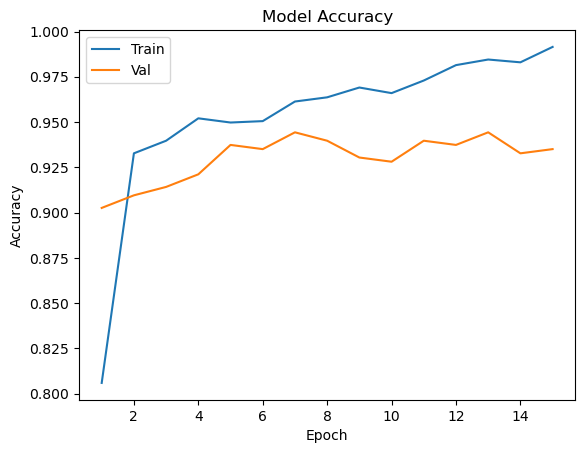

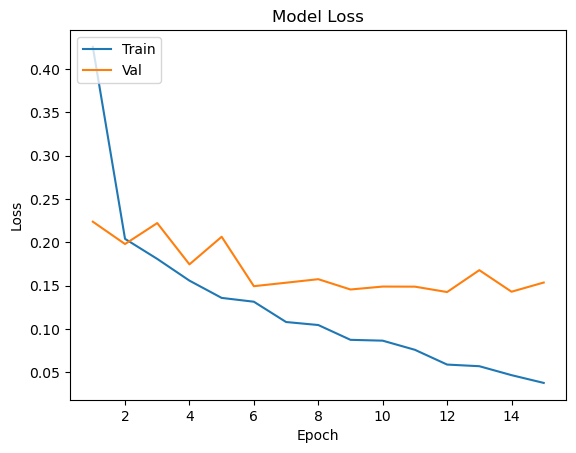

In [99]:
plot_learning_curve(history_filtered, NUMBER_OF_EPOCHS)

In [100]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn_filtered = np.argmax(cnn_model_filtered.predict(X_raw_filtered_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_filtered_test, predicted_cnn_filtered))
print(accuracy_score(y_raw_filtered_test, predicted_cnn_filtered))
print(f1_score(y_raw_filtered_test, predicted_cnn_filtered, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

14/14 [==============================] - 0s 5ms/step
[[202  14]
 [ 14 201]]
0.9350348027842227
0.9350348027842227


In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_filtered_test, predicted_cnn_filtered))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.93      0.93      0.93       215

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431



In [102]:
results_filtered = cnn_model_filtered.evaluate(X_raw_filtered_test, y_raw_filtered_test)
print("test loss, test acc: ", results_filtered)

14/14 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9350
test loss, test acc:  [0.153490349650383, 0.9350348114967346]


In [145]:
cnn_filtered_cv_metrics = feature_util.cross_val_cnn(X_raw_filtered_train, y_raw_filtered_train, X_raw_filtered_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_filtered_cv_metrics)

0.9396785497665405


## III - Filtered and Normalised

In [103]:
data_filtered_normalised = pd.read_csv("New Datasets/filtered_normalised_smartfall_training_dataset.csv")
data_filtered_normalised = pd.concat([data_filtered_normalised, pd.read_csv("New Datasets/filtered_normalised_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)

data_filtered_normalised = data_filtered_normalised.drop(['Unnamed: 0'], axis=1)
data_filtered_normalised

,x_ax,y_ax,z_ax,outcome
0,0.480550,0.365079,0.546276,0
1,0.465597,0.373657,0.550988,0
2,0.458001,0.378245,0.551552,0
3,0.459400,0.377609,0.546882,0
4,0.465448,0.373819,0.539552,0
...,...,...,...,...
183801,0.314151,0.436371,0.556205,0
183802,0.304108,0.440144,0.555801,0
183803,0.298599,0.444842,0.553127,0
183804,0.299858,0.452044,0.546193,0


In [104]:
X_filtered_normalised, y_filtered_normalised = feature_util.get_frames(data_filtered_normalised, frame_size, hop_size, True)
features_filtered_normalised = feature_util.extract_features(X_filtered_normalised)
features_filtered_normalised.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [105]:
feature_filtered_normalised_df = pd.DataFrame(features_filtered_normalised)

y_filtered_normalised_df = pd.DataFrame(y_filtered)
y_filtered_normalised_df = y_filtered_normalised_df.rename(mapper={0:"outcome"}, axis=1)
y_filtered_normalised_df
feature_and_outcome_filtered_normalised_df = pd.concat([feature_filtered_normalised_df, y_filtered_normalised_df], axis=1)

In [106]:
feature_and_outcome_filtered_normalised_df['outcome'].value_counts()

0    11390
1      862
Name: outcome, dtype: int64

In [107]:
falls_filtered_normalised_df = feature_and_outcome_filtered_normalised_df[feature_and_outcome_filtered_normalised_df['outcome'] == 1]
not_falls_filtered_normalised_df = feature_and_outcome_filtered_normalised_df[feature_and_outcome_filtered_normalised_df['outcome'] == 0]

undersampled_not_falls_filtered_normalised = not_falls_filtered_normalised_df.sample(n=len(falls_filtered_normalised_df), random_state=42)
balanced_features_filtered_normalised = pd.concat([undersampled_not_falls_filtered_normalised, falls_filtered_normalised_df])
balanced_features_filtered_normalised = balanced_features_filtered_normalised.sample(frac=1, random_state=42)
balanced_features_filtered_normalised

,0,1,2,3,4,5,6,7,8,9,10,outcome
5572,0.477350,0.475114,0.480927,0.069954,0.071545,0.071609,-1.416715,-1.422563,-1.577936,1.012556,0.687352,0
2108,0.465725,0.466313,0.471355,0.123879,0.121342,0.126107,1.188743,0.125978,1.092278,1.338434,0.549976,1
2899,0.430257,0.427350,0.434117,0.083647,0.084926,0.085098,-1.109128,-1.341821,-1.183058,0.919024,0.491489,0
4603,0.474199,0.471472,0.476771,0.101213,0.100071,0.098978,2.840996,1.401276,1.653136,1.279757,0.455349,1
5589,0.460982,0.457042,0.462321,0.072122,0.074957,0.074548,-1.364787,-1.409618,-1.384226,0.982568,0.599971,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,0.470730,0.471358,0.477354,0.076300,0.079704,0.084713,-0.724965,-1.189207,-0.783052,1.025568,0.594857,1
4270,0.466613,0.466100,0.468764,0.112126,0.110932,0.113352,-0.111458,-0.364597,-0.828524,1.220869,0.500487,1
9936,0.379065,0.387033,0.392818,0.175151,0.170988,0.175836,-1.490069,-1.427926,-1.493726,1.056901,0.260957,0
7604,0.386634,0.392462,0.395599,0.146605,0.140399,0.141793,-0.341771,-0.402248,-0.829115,1.193058,0.297425,1


In [108]:
features_filtered_normalised_shuffled = balanced_features_filtered_normalised.drop(columns=['outcome'])
features_filtered_normalised_shuffled

outcome_filtered_normalised_shuffled = balanced_features_filtered_normalised.loc[:,['outcome']]
outcome_filtered_normalised_shuffled.value_counts()

outcome
0          862
1          862
dtype: int64

In [109]:
X_filtered_normalised_train, X_filtered_normalised_test, y_filtered_normalised_train, y_filtered_normalised_test = train_test_split(features_filtered_normalised_shuffled, outcome_filtered_normalised_shuffled, test_size=0.25, random_state=0, stratify=outcome_filtered_normalised_shuffled)

In [110]:
X_filtered_normalised_train.shape, X_filtered_normalised_test.shape, y_filtered_normalised_train.shape, y_filtered_normalised_test.shape

((1293, 11), (431, 11), (1293, 1), (431, 1))

In [111]:
unique, counts = np.unique(y_filtered_train, return_counts=True)
dict(zip(unique, counts))

{0: 646, 1: 647}

### Traditional Machine Learning Methods

In [112]:
filtered_normalised_model_name_array = []
filtered_normalised_model_acc_array = []

In [113]:
knn_model_filtered_normalised = KNeighborsClassifier(n_neighbors=5)
knn_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [114]:
# Predict on the test set
predicted_knn_filtered_normalised = knn_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_knn_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_knn_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_knn_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("knn")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_knn_filtered_normalised))

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[178  38]
 [ 20 195]]
0.8654292343387471
0.8654292343387471


In [115]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [116]:
svm_model_filtered_normalised = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [117]:
# Predict on the test set
predicted_svm_filtered_normalised = svm_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_svm_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_svm_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_svm_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("svm")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_svm_filtered_normalised))

[[192  24]
 [ 26 189]]
0.8839907192575406
0.8839907192575406


In [118]:
svm_rbf_model_filtered_normalised = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [119]:
# Predict on the test set
predicted_svm_rbf_filtered_normalised = svm_rbf_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("svm_rbf")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))

[[185  31]
 [ 20 195]]
0.8816705336426914
0.8816705336426914


In [120]:
rf_model_filtered_normalised = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_filtered_normalised.fit(X_filtered_train, y_filtered_normalised_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_42680\1829240526.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_filtered_normalised.fit(X_filtered_train, y_filtered_normalised_train)


RandomForestClassifier(random_state=42)

In [121]:
# Predict on the test set
predicted_rf_filtered_normalised = rf_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_rf_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_rf_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_rf_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("rf")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_rf_filtered_normalised))

[[216   0]
 [215   0]]
0.5011600928074246
0.5011600928074246


In [122]:
nb_model_filtered_normalised = GaussianNB()
nb_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [123]:
# Predict on the test set
predicted_nb_filtered_normalised = nb_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_nb_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_nb_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_nb_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("nb")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_nb_filtered_normalised))

[[205  11]
 [ 56 159]]
0.8445475638051044
0.8445475638051044


In [124]:
best_trad_model_acc_filtered_normalised = max(filtered_normalised_model_acc_array)
index = filtered_normalised_model_acc_array.index(max(filtered_normalised_model_acc_array))
best_trad_model_filtered_normalised = filtered_normalised_model_name_array[index]
print(f"Best model: {best_trad_model_filtered_normalised}, Accuracy: {best_trad_model_acc_filtered_normalised}")

Best model: svm, Accuracy: 0.8839907192575406


In [125]:
for i in range(0, len(filtered_normalised_model_name_array)):
    print(f"name: {filtered_normalised_model_name_array[i]}, accuracy: {filtered_normalised_model_acc_array[i]}")

name: knn, accuracy: 0.8654292343387471
name: svm, accuracy: 0.8839907192575406
name: svm_rbf, accuracy: 0.8816705336426914
name: rf, accuracy: 0.5011600928074246
name: nb, accuracy: 0.8445475638051044


In [126]:
filtered_normalised_model_dictionary = {"knn": knn_model_filtered_normalised,
                             "svm": svm_model_filtered_normalised,
                             "svm_rbf": svm_rbf_model_filtered_normalised,
                             "rf": rf_model_filtered_normalised,
                             "nb": nb_model_filtered_normalised}

In [127]:
scores_array_filtered_normalised = perform_cross_val_all_models(filtered_normalised_model_dictionary, X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [128]:
for cv_tuple in scores_array_filtered_normalised:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.87 (+/- 0.04)
svm Accuracy: 0.87 (+/- 0.04)
svm_rbf Accuracy: 0.87 (+/- 0.02)
rf Accuracy: 0.89 (+/- 0.03)
nb Accuracy: 0.81 (+/- 0.07)


In [129]:
print_all_classification_reports(filtered_normalised_model_dictionary, X_filtered_normalised_test, y_filtered_normalised_test)

Classification report for knn
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       216
           1       0.84      0.91      0.87       215

    accuracy                           0.87       431
   macro avg       0.87      0.87      0.87       431
weighted avg       0.87      0.87      0.87       431

Classification report for svm
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       216
           1       0.89      0.88      0.88       215

    accuracy                           0.88       431
   macro avg       0.88      0.88      0.88       431
weighted avg       0.88      0.88      0.88       431

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       216
           1       0.86      0.91      0.88       215

    accuracy                           0.88       431
   macro avg       0.88      0.88 

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

In [130]:
print_all_classification_reports_training(filtered_normalised_model_dictionary, X_filtered_normalised_train, y_filtered_normalised_train)

Classification report for knn
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       646
           1       0.90      0.92      0.91       647

    accuracy                           0.91      1293
   macro avg       0.91      0.91      0.91      1293
weighted avg       0.91      0.91      0.91      1293

Classification report for svm
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       646
           1       0.88      0.87      0.88       647

    accuracy                           0.88      1293
   macro avg       0.88      0.88      0.88      1293
weighted avg       0.88      0.88      0.88      1293

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       646
           1       0.86      0.89      0.88       647

    accuracy                           0.87      1293
   macro avg       0.88      0.87 

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

In [131]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'New Models/rf_filtered_normalised.joblib')

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [132]:
X_filtered_normalised_undersampled, y_filtered_normalised_undersampled = feature_util.balance_windows_undersample(X_filtered_normalised, y_filtered_normalised)
X_filtered_normalised_undersampled.shape, y_filtered_normalised_undersampled.shape

((1724, 31, 3), (1724,))

In [133]:
# X_raw_filtered_normalised_train, X_raw_filtered_normalised_test, y_raw_filtered_normalised_train, y_raw_filtered_normalised_test = train_test_split(X_filtered_normalised, y_filtered_normalised, test_size=0.25, random_state=0, stratify=y_filtered_normalised)
X_raw_filtered_normalised_train, X_raw_filtered_normalised_test, y_raw_filtered_normalised_train, y_raw_filtered_normalised_test = train_test_split(X_filtered_normalised_undersampled, y_filtered_normalised_undersampled, test_size=0.25, random_state=0, stratify=y_filtered_normalised_undersampled)
X_raw_filtered_normalised_train.shape, X_raw_filtered_normalised_test.shape, y_raw_filtered_normalised_train.shape

((1293, 31, 3), (431, 31, 3), (1293,))

In [134]:
X_raw_filtered_normalised_train[0].shape

(31, 3)

In [135]:
X_raw_filtered_normalised_train = X_raw_filtered_normalised_train.reshape(X_TRAIN_SIZE, 31, 3, 1)
X_raw_filtered_normalised_test = X_raw_filtered_normalised_test.reshape(X_TEST_SIZE, 31, 3, 1)

In [136]:
X_raw_filtered_normalised_train[0].shape, X_raw_filtered_normalised_test[0].shape

((31, 3, 1), (31, 3, 1))

In [137]:
cnn_model_filtered_normalised = Sequential()
cnn_model_filtered_normalised.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_filtered_normalised_train[0].shape))
cnn_model_filtered_normalised.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model_filtered_normalised.add(Flatten())
cnn_model_filtered_normalised.add(Dense(64, activation='relu'))
cnn_model_filtered_normalised.add(Dense(2, activation='softmax'))

In [138]:
cnn_model_filtered_normalised.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
history_filtered_normalised = cnn_model_filtered_normalised.fit(X_raw_filtered_normalised_train, y_raw_filtered_normalised_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_filtered_normalised_test, y_raw_filtered_normalised_test), verbose=1)

Epoch 1/15
41/41 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5135 - val_loss: 0.6738 - val_accuracy: 0.4988
Epoch 2/15
41/41 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7409 - val_loss: 0.5079 - val_accuracy: 0.8515
Epoch 3/15
41/41 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8384 - val_loss: 0.3647 - val_accuracy: 0.8585
Epoch 4/15
41/41 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8848 - val_loss: 0.2838 - val_accuracy: 0.8933
Epoch 5/15
41/41 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8948 - val_loss: 0.2733 - val_accuracy: 0.9002
Epoch 6/15
41/41 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.9033 - val_loss: 0.2638 - val_accuracy: 0.8910
Epoch 7/15
41/41 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9165 - val_loss: 0.2733 - val_accuracy: 0.9095
Epoch 8/15
41/41 [==

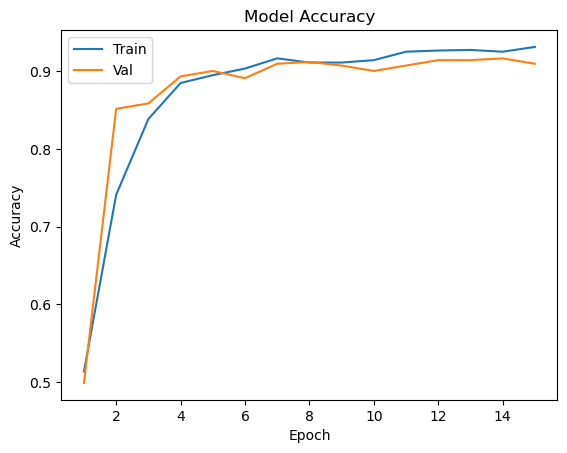

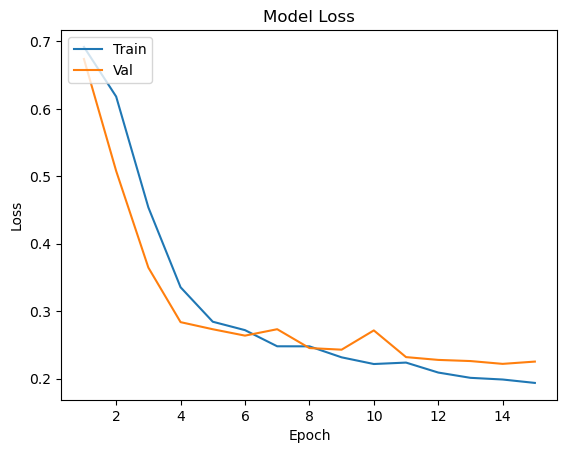

In [140]:
plot_learning_curve(history_filtered_normalised, NUMBER_OF_EPOCHS)

In [141]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn_filtered_normalised = np.argmax(cnn_model_filtered_normalised.predict(X_raw_filtered_normalised_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))
print(accuracy_score(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))
print(f1_score(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

14/14 [==============================] - 0s 1ms/step
[[194  22]
 [ 17 198]]
0.9095127610208816
0.9095127610208816


In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       216
           1       0.90      0.92      0.91       215

    accuracy                           0.91       431
   macro avg       0.91      0.91      0.91       431
weighted avg       0.91      0.91      0.91       431



In [143]:
results_filtered_normalised = cnn_model_filtered.evaluate(X_raw_filtered_normalised_test, y_raw_filtered_normalised_test)
print("test loss, test acc: ", results_filtered_normalised)

14/14 [==============================] - 0s 2ms/step - loss: 1.9252 - accuracy: 0.5012
test loss, test acc:  [1.9251774549484253, 0.5011600852012634]


In [146]:
cnn_filtered_normalised_cv_metrics = feature_util.cross_val_cnn(X_raw_filtered_normalised_train, y_raw_filtered_normalised_train, X_raw_filtered_normalised_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_filtered_normalised_cv_metrics)

0.9156954407691955
